## REDES NEURONALES

# Librerías

In [11]:
import pandas as pd
import pydot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import accuracy_score
import numpy as np

# Código

# Clasificación de la calidad del vino

Importamos el dataset del vino. P.D: Se intentó mejorar la precisión del modelo usando otro archivo con más datos, pero no resultó ser la solución.

In [12]:
wine = pd.read_csv('csv/WineQT.csv')

Mostramos las 5 primeras filas del dataset:

In [13]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


Mostramos las 5 últimas filas del dataset:

In [14]:
wine.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


Mostramos datos de interés referentes al dataset que vamos a usar para este problema de clasificación:

In [15]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Mostramos un mapa de calor para reconocer las columnas que tienen poca relación con nuestra columna objetivo, en este caso, la columa "quality":

<Axes: >

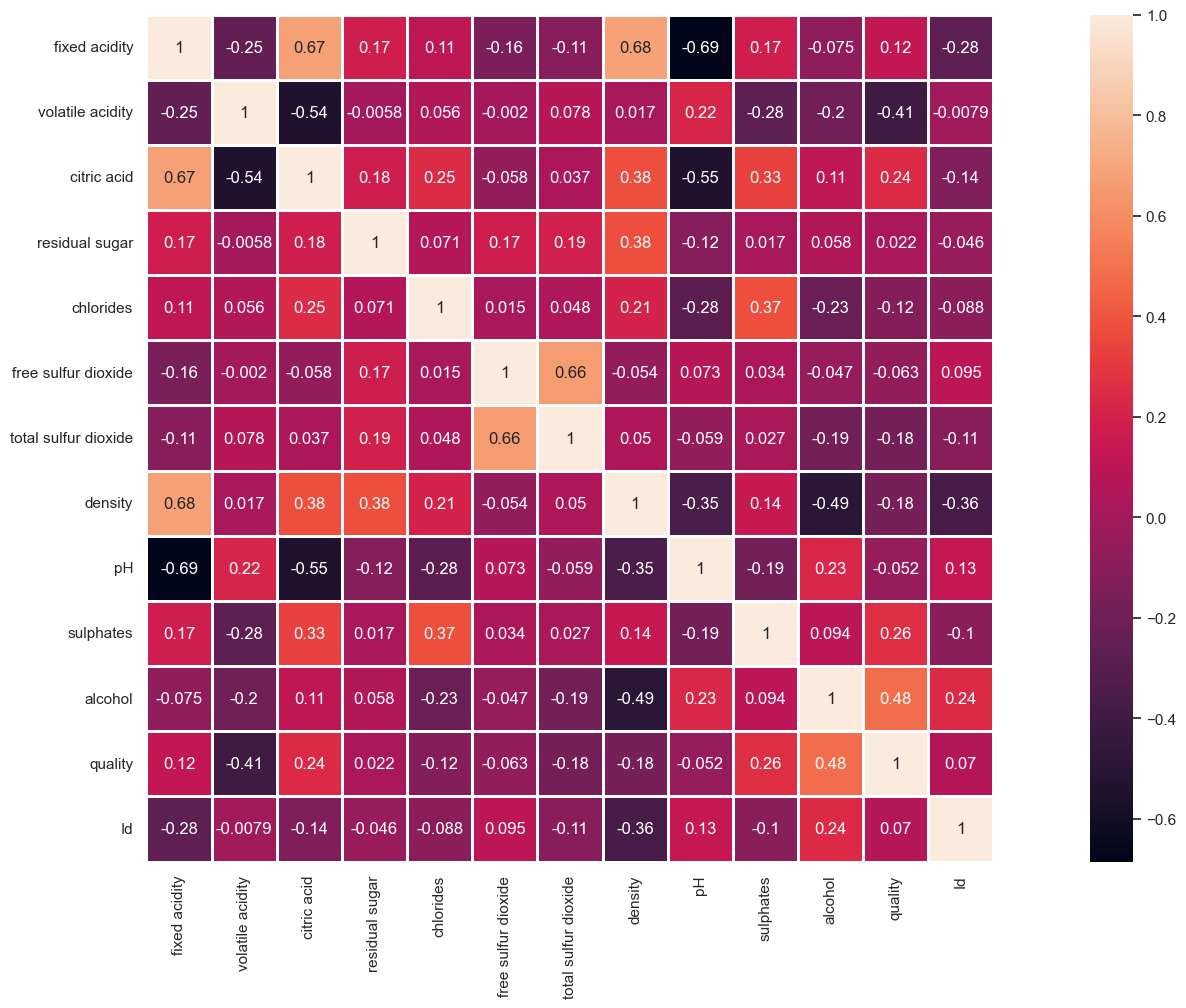

In [16]:
sns.set()
fig, ax = plt.subplots(figsize=(25,11))    
sns.heatmap(wine.corr(), square=True, annot=True, linewidths=2)

Podemos borrar las columnas que no tienen mucha relación con "quality", también he probado a entrenar los modelos sin borrar dichas columnas, no ha influido mucho, pero lo poco que ha cambiado ha sido para bien, la precisión se ha visto aumentada, aunque no mucho.

In [17]:
train_wine, test_wine = train_test_split(wine, test_size=0.2, random_state=42)

Empezamos a preparar y dividir los datos para entrenar los modelos posteriormente:

In [18]:
# PARA EL DATASET DE WineQT.csv
X_train = train_wine.drop(['quality'], axis=1)
y_train = train_wine['quality']
X_test = test_wine.drop(['quality'], axis=1)
y_test = test_wine['quality']

Escalamos los datos para obtener mejores resultados:

In [19]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

En vez de entrenar un solo modelo, vamos a entrenar muchos y vamos a quedarnos con el que mejor precisión tenga. Para hacerlo vamos a hacer varias combinaciones de los distintos parámetros que podemos variar en el entrenamiento de un modelo, el optimizer, el dropout rate y units (el número de neuronas):

In [20]:
def create_model(units=64, dropout_rate=0.2, optimizer='adam', learning_rate=0.001):
    model = Sequential([
        Dense(units=units, activation='relu', input_shape=(12,)),
        Dense(units=units, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# define hyperparameters to search
units = [16, 32, 64, 128]
dropout_rate = [0.1, 0.2, 0.3]
#optimizer = ['adam', 'rmsprop']
optimizer = ['adam', 'rmsprop', 'sgd', 'adagrad', 'adadelta', 'adamax', 'nadam']

# initialize best accuracy and corresponding model
best_accuracy = 0
best_model = None

# iterate over hyperparameters and train models
for u in units:
    for d in dropout_rate:
        for o in optimizer:
            print(f'Training model with units={u}, dropout={d}, optimizer={o}')
            
            # create and compile model
            model = create_model(units=u, dropout_rate=d, optimizer=o)
            
            # define early stopping and model checkpoint callbacks
            early_stop = EarlyStopping(monitor='val_loss', patience=5)
            checkpoint = ModelCheckpoint('models/best_model_wine.h5', save_best_only=True)
            
            # train model
            history = model.fit(X_train, y_train, batch_size=32, epochs=50, 
                                validation_data=(X_test, y_test), callbacks=[early_stop, checkpoint])
            
            # evaluate model on test set
            y_prob = model.predict(X_test)
            y_pred = y_prob.argmax(axis=-1)
            accuracy = accuracy_score(y_test, y_pred)
            print(f'Test accuracy: {accuracy*100}%')
            
            # save best model if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

print(f'Best test accuracy: {best_accuracy*100}%')
best_model.save('models/final_model_wine.h5')

Training model with units=16, dropout=0.1, optimizer=adam
Epoch 1/50
29/29 [==============================] - 1s 11ms/step - loss: 2.2074 - accuracy: 0.0678 - val_loss: 2.0682 - val_accuracy: 0.2358
Epoch 2/50
29/29 [==============================] - 0s 4ms/step - loss: 1.9237 - accuracy: 0.3490 - val_loss: 1.6882 - val_accuracy: 0.4236
Epoch 3/50
29/29 [==============================] - 0s 4ms/step - loss: 1.5475 - accuracy: 0.3796 - val_loss: 1.3373 - val_accuracy: 0.4760
Epoch 4/50
29/29 [==============================] - 0s 4ms/step - loss: 1.3424 - accuracy: 0.3961 - val_loss: 1.2197 - val_accuracy: 0.4672
Epoch 5/50
29/29 [==============================] - 0s 4ms/step - loss: 1.2730 - accuracy: 0.4278 - val_loss: 1.1769 - val_accuracy: 0.4891
Epoch 6/50
29/29 [==============================] - 0s 4ms/step - loss: 1.2385 - accuracy: 0.4694 - val_loss: 1.1524 - val_accuracy: 0.5153
Epoch 7/50
29/29 [==============================] - 0s 4ms/step - loss: 1.2195 - accuracy: 0.4726 - v

Al haber guardado el modelo, lo cargamos y comprobamos su precisión con los datos de test que tenemos:

In [21]:
# load the saved model from file
# model = load_model('models/best_model_wine.h5')
model2 = load_model('models/final_model_wine.h5')

# evaluate the model on test data and get accuracy score
# accuracy = model.evaluate(X_test, y_test)
accuracy2 = model2.evaluate(X_test, y_test)
# print('Best Model Accuracy: %.2f%%' % (accuracy[1] * 100))
print('Final Model Accuracy: %.2f%%' % (accuracy2[1] * 100))

8/8 [==============================] - 0s 1ms/step - loss: 0.8995 - accuracy: 0.6812
Best Model Accuracy: 64.63%
Final Model Accuracy: 68.12%


# Clasificar entre presencia de enfermedad del corazón o no

Importamos el dataset que vamos a usar en este problema de clasificación binaria:

In [22]:
heart = pd.read_csv('csv/heart.csv')

Mostramos las 5 primeras columnas del dataset:

In [23]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Mostramos las 5 últimas columnas del dataset:

In [24]:
heart.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


Mostramos un mapa de calor para ver que características de nuestro dataset tienen poca relación con nuestra columa objetivo, en este caso "HeartDisease":

C:\Users\Aitor\AppData\Local\Temp\ipykernel_17184\2780210901.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart.corr(), square=True, annot=True, linewidths=2)


<Axes: >

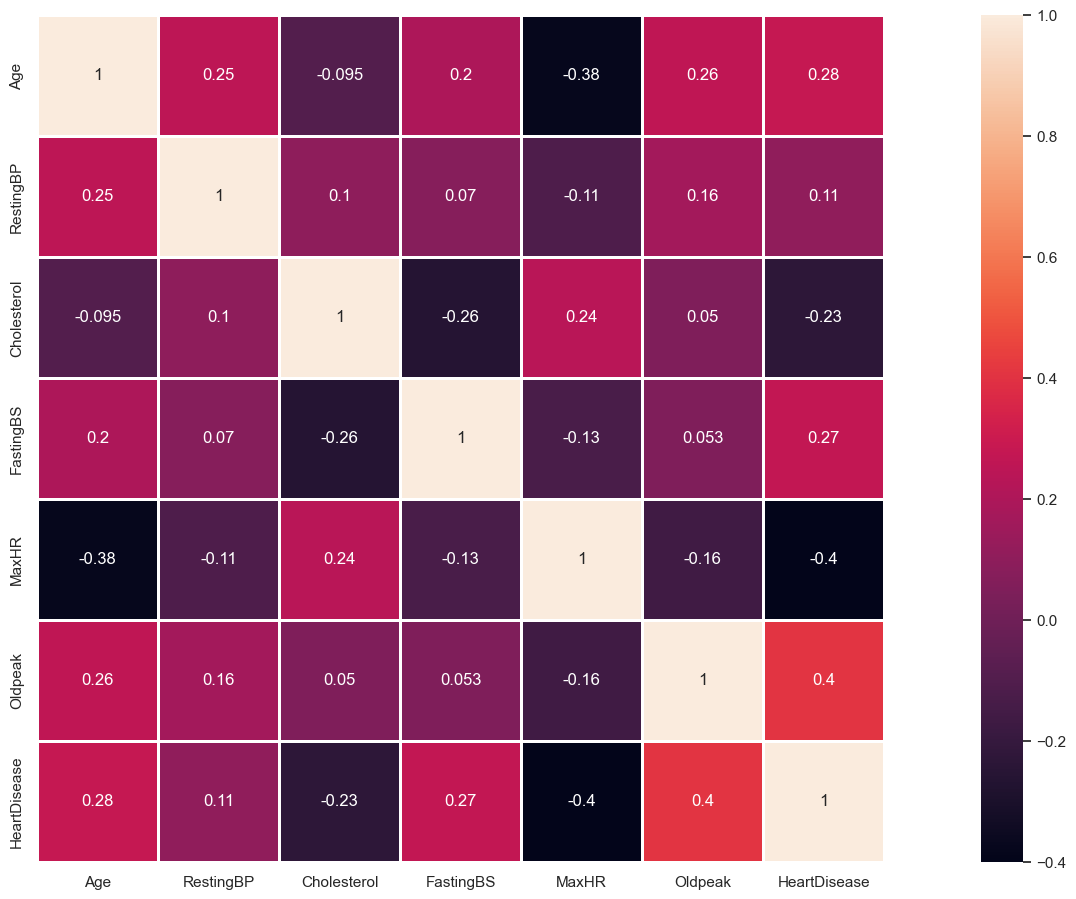

In [25]:
sns.set()
fig, ax = plt.subplots(figsize=(25,11))    
sns.heatmap(heart.corr(), square=True, annot=True, linewidths=2)

Podríamos borrar las columnas que no tengan mucha relación con nuestro objetivo, pero la verdad es que no es muy necesario ya que la precisión no se ve mermada.

Transformamos las columnas de tipo string en numéricas para que a la hora de entrenar nuestros modelos no tengamos problemas:

In [26]:
heart = heart.apply(lambda col: pd.factorize(col, sort=True)[0])

Comprobamos que todo se ha transformado correctamente:

In [27]:
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,147,0,1,98,0,10,2,0
1,21,0,2,55,40,0,1,82,0,20,1,1
2,9,1,1,31,141,0,2,25,0,10,2,0
3,20,0,0,39,72,0,1,34,1,25,1,1
4,26,1,2,49,53,0,1,48,0,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,17,1,3,14,122,0,1,58,0,22,1,1
914,40,1,0,45,51,1,1,67,0,42,1,1
915,29,1,0,31,9,0,1,41,1,22,1,1
916,29,0,1,31,94,0,0,100,0,10,1,1


Comenzamos la división de datos para el entrenamiento de los modelos:

In [28]:
train_heart, test_heart = train_test_split(heart, test_size=0.2, random_state=42)

In [29]:
X_train = train_heart.drop(['HeartDisease'], axis=1)
y_train = train_heart['HeartDisease']
X_test = test_heart.drop(['HeartDisease'], axis=1)
y_test = test_heart['HeartDisease']

Escalamos los datos para obtener mejores resultados:

In [30]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Hacemos lo mismo que con nuestro dataset de la calidad del vino, vamos a entrenar múltiples modelos y vamos a guardar el mejor de todos:

In [31]:
def create_model(units=64, dropout_rate=0.2, optimizer='adam', learning_rate=0.001):
    model = Sequential([
        Dense(units=units, activation='relu', input_shape=(11,)),
        Dense(units=units, activation='relu'),
        Dense(units=10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# define hyperparameters to search
units = [16, 32, 64, 128]
dropout_rate = [0.1, 0.2, 0.3]
#optimizer = ['adam', 'rmsprop']
optimizer = ['adam', 'rmsprop', 'sgd', 'adagrad', 'adadelta', 'adamax', 'nadam']

# initialize best accuracy and corresponding model
best_accuracy = 0
best_model = None

# iterate over hyperparameters and train models
for u in units:
    for d in dropout_rate:
        for o in optimizer:
            print(f'Training model with units={u}, dropout={d}, optimizer={o}')
            
            # create and compile model
            model = create_model(units=u, dropout_rate=d, optimizer=o)
            
            # define early stopping and model checkpoint callbacks
            early_stop = EarlyStopping(monitor='val_loss', patience=5)
            checkpoint = ModelCheckpoint('models/best_model_heart.h5', save_best_only=True)
            
            # train model
            history = model.fit(X_train, y_train, batch_size=32, epochs=50, 
                                validation_data=(X_test, y_test), callbacks=[early_stop, checkpoint])
            
            # evaluate model on test set
            y_prob = model.predict(X_test)
            y_pred = y_prob.argmax(axis=-1)
            accuracy = accuracy_score(y_test, y_pred)
            print(f'Test accuracy: {accuracy*100}%')
            
            # save best model if accuracy improves
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model

print(f'Best test accuracy: {best_accuracy*100}%')
best_model.save('models/final_model_heart.h5')

Training model with units=16, dropout=0.1, optimizer=adam
Epoch 1/50
23/23 [==============================] - 1s 10ms/step - loss: 2.0600 - accuracy: 0.3474 - val_loss: 1.7834 - val_accuracy: 0.5761
Epoch 2/50
23/23 [==============================] - 0s 4ms/step - loss: 1.5837 - accuracy: 0.5463 - val_loss: 1.3264 - val_accuracy: 0.5815
Epoch 3/50
23/23 [==============================] - 0s 4ms/step - loss: 1.1856 - accuracy: 0.5463 - val_loss: 1.0066 - val_accuracy: 0.5815
Epoch 4/50
23/23 [==============================] - 0s 4ms/step - loss: 0.9346 - accuracy: 0.5463 - val_loss: 0.8323 - val_accuracy: 0.5815
Epoch 5/50
23/23 [==============================] - 0s 4ms/step - loss: 0.7921 - accuracy: 0.5545 - val_loss: 0.7253 - val_accuracy: 0.6304
Epoch 6/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.6962 - val_loss: 0.6522 - val_accuracy: 0.7772
Epoch 7/50
23/23 [==============================] - 0s 4ms/step - loss: 0.6319 - accuracy: 0.7861 - v

Una vez que hemos guardado dichos modelos, cargamos el mejor y comprobamos su eficacia con los datos de test que tenemos:

In [32]:
# load the saved model from file
# model = load_model('models/best_model_heart.h5')
model2 = load_model('models/final_model_heart.h5')

# evaluate the model on test data and get accuracy score
# accuracy = model.evaluate(X_test, y_test)
accuracy2 = model2.evaluate(X_test, y_test)
# print('Best Model Accuracy: %.2f%%' % (accuracy[1] * 100))
print('Final Model Accuracy: %.2f%%' % (accuracy2[1] * 100))

6/6 [==============================] - 0s 2ms/step - loss: 0.2928 - accuracy: 0.9130
Best Model Accuracy: 86.41%
Final Model Accuracy: 91.30%
